In [6]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

DSE2T1=5.324161022769655e-19
DSE2T2=4.1249471426737316e-19

<IPython.core.display.Javascript object>


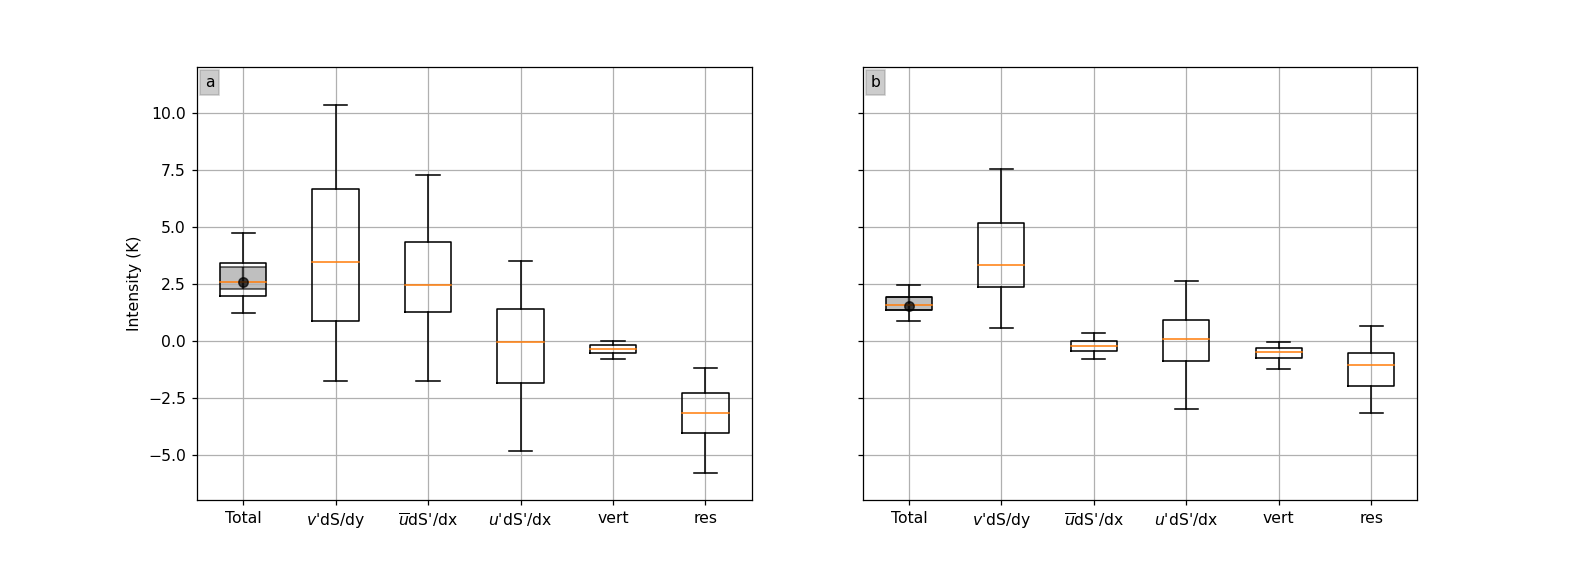

1.4328011202913962 4.4057560048439885
5.169867396688583e+18 -3.735634142080504e+17 4.690507285602486e+16 -3.2666018856189804e+18 -2.6915040117435328e+17 -1.544558081861681e+18
2.7458257197305596
3.8718546519007746
-0.29549817923321275
2.8451893356023903
-4.179113830572951
-0.3990606707809912
-3.2766594177584007


/tmp/ipykernel_3555175/4043276983.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


0.8260446335464808 5.067547951338152
4.258953689367986e+18 -5.889427709519542e+17 -2.444495008313981e+17 -2.576003929105137e+18 -4.1147206105992474e+17 -5.248043905834255e+17
1.6289177648508433
8.971006359264813e+18
-1.0635421662615418e+17
-5.807515034505951e+17
-1.3508926090686392e+18
-2.98406587762677e+18


/tmp/ipykernel_3555175/4043276983.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


In [90]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

import matplotlib.patches as patches
from matplotlib.patches import Rectangle

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(14, 5)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)

with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

ax[0].boxplot([np.array(int0)*DSE2T1, np.array(int1)*DSE2T1, np.array(int3)*DSE2T1, np.array(int2)*DSE2T1,
             np.array(int5)*DSE2T1, np.array(int6)*DSE2T1], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
ax[0].set_ylim([-7,12])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

# plt.rcParams['text.usetex'] = True

ax[0].grid()
ax[0].set_ylabel('Intensity (K)')
set_label(fig, ax[0], 'a')

###########################################################################################################


p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]
mx=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

# plt.rcParams['text.usetex'] = True
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

ax[1].boxplot([np.array(int0)*DSE2T2, np.array(int1)*DSE2T2, np.array(int3)*DSE2T2, np.array(int2)*DSE2T2,
             np.array(int5)*DSE2T2, np.array(int6)*DSE2T2], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
ax[1].set_ylim([-7,12])


ax[0].errorbar([1], [2.583867846558015], yerr=[[2.583867846558015-2.2427423070075174],
                                               [3.213017329668999-2.583867846558015]],
               capsize=15, fmt="o", color = "black", alpha=0.7)
ax[1].errorbar([1], [1.5278414526773103], yerr=[[1.5278414526773103-1.3327869260566496],
                                               [1.9236981630317567-1.5278414526773103]],
               capsize=15, fmt="o", color = "black", alpha=0.7)

ax[0].bar(1, 0.9702750226614816, bottom=2.2427423070075174, width=.5, color='grey', zorder=0, align='center', alpha=0.5)
ax[1].bar(1, 0.5909112369751071, bottom=1.3327869260566496, width=.5, color='grey', zorder=0, align='center', alpha=0.5)

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
# print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

ax[1].grid()
set_label(fig, ax[1], 'b')
plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int90.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


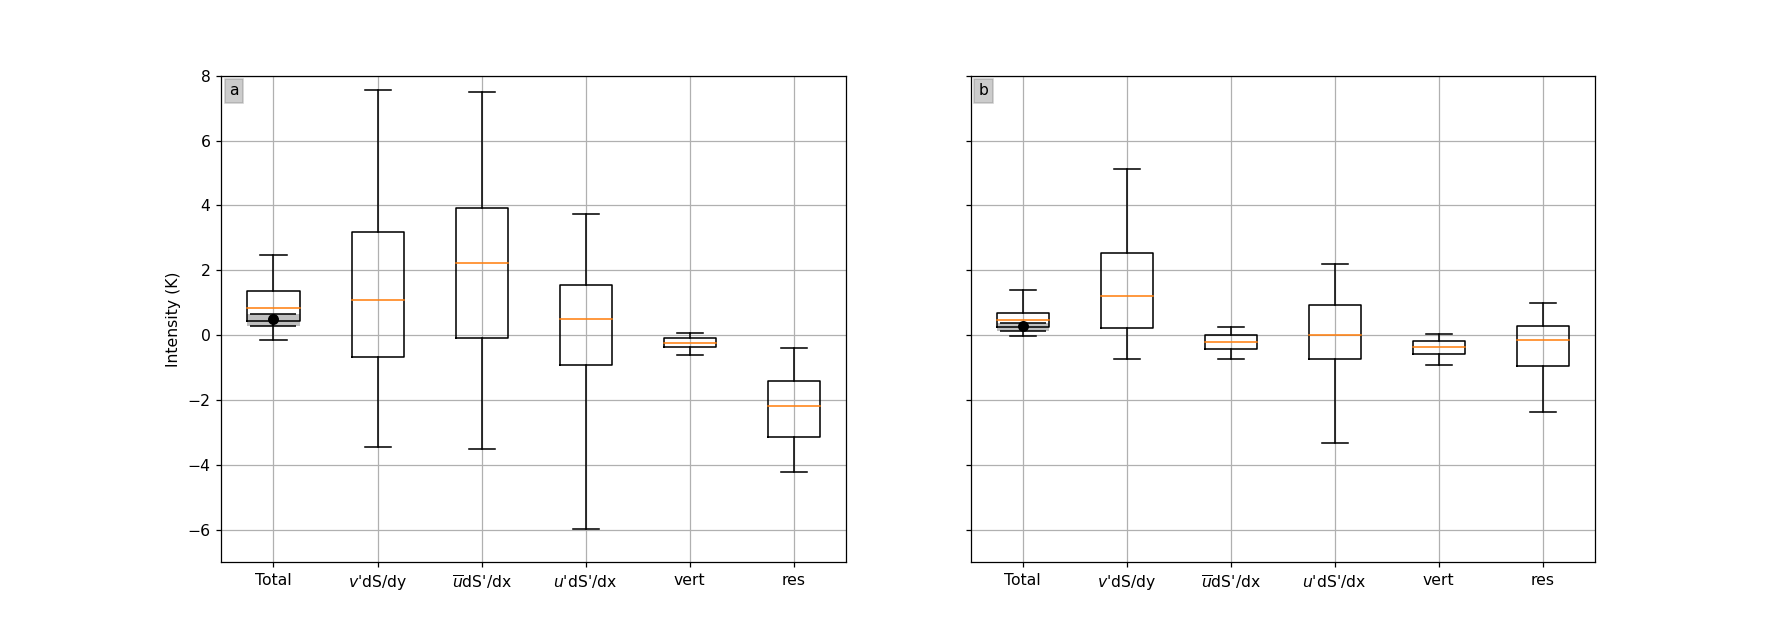

1.4328011202913962 4.4057560048439885
4.450132069572772e+18 1.936840439614903e+17 3.233835901184357e+17 -3.582349194966887e+18 -1.9006358318638096e+17 -1.298390243573887e+18
0.9619788512352808
1.4450182746008866
0.013707515035601293
2.0149876587627187
-5.023436773479202
-0.24907065267823048
-2.262663944485695
0.8260446335464808 5.067547951338152
4.0382736191427185e+18 -1.7647230481140794e+17 -2.5376236664619853e+17 -3.068505222481572e+18 -3.6305759778968845e+17 -1.7690796337785894e+17
0.5162843734956007
3.7122740375369175e+18
-9.970946231667627e+16
-5.395909008955661e+17
-9.416049269200996e+17
-8.797542281432394e+17


/tmp/ipykernel_3555175/3016536430.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


In [96]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(14, 5)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)

with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

ax[0].boxplot([np.array(int0)*DSE2T1, np.array(int1)*DSE2T1, np.array(int3)*DSE2T1, np.array(int2)*DSE2T1,
             np.array(int5)*DSE2T1, np.array(int6)*DSE2T1], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
ax[0].set_ylim([-7,12])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

# plt.rcParams['text.usetex'] = True

ax[0].grid()
ax[0].set_ylabel('Intensity (K)')

###########################################################################################################


p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]
mx=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

# plt.rcParams['text.usetex'] = True
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

ax[1].boxplot([np.array(int0)*DSE2T2, np.array(int1)*DSE2T2, np.array(int3)*DSE2T2, np.array(int2)*DSE2T2,
             np.array(int5)*DSE2T2, np.array(int6)*DSE2T2], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
ax[1].set_ylim([-7,8])

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
# print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

ax[0].errorbar([1], [0.5072734291275834], yerr=[[0.5072734291275834-0.2704597300763419],
                                               [0.6667210187660103-0.5072734291275834]],
               capsize=15, fmt="o", color = "black")
ax[1].errorbar([1], [0.2824116618843382], yerr=[[0.2824116618843382-0.12032152737742047],
                                               [0.3748049049299578-0.2824116618843382]],
               capsize=15, fmt="o", color = "black")

ax[0].bar(1, 0.3962612886896684, bottom=0.2704597300763419, width=.5, color='grey', zorder=0, align='center', alpha=0.5)
ax[1].bar(1, 0.25448337755253736, bottom=0.12032152737742047, width=.5, color='grey', zorder=0, align='center', alpha=0.5)


ax[1].grid()
set_label(fig, ax[0], 'a')
set_label(fig, ax[1], 'b')
plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int10.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


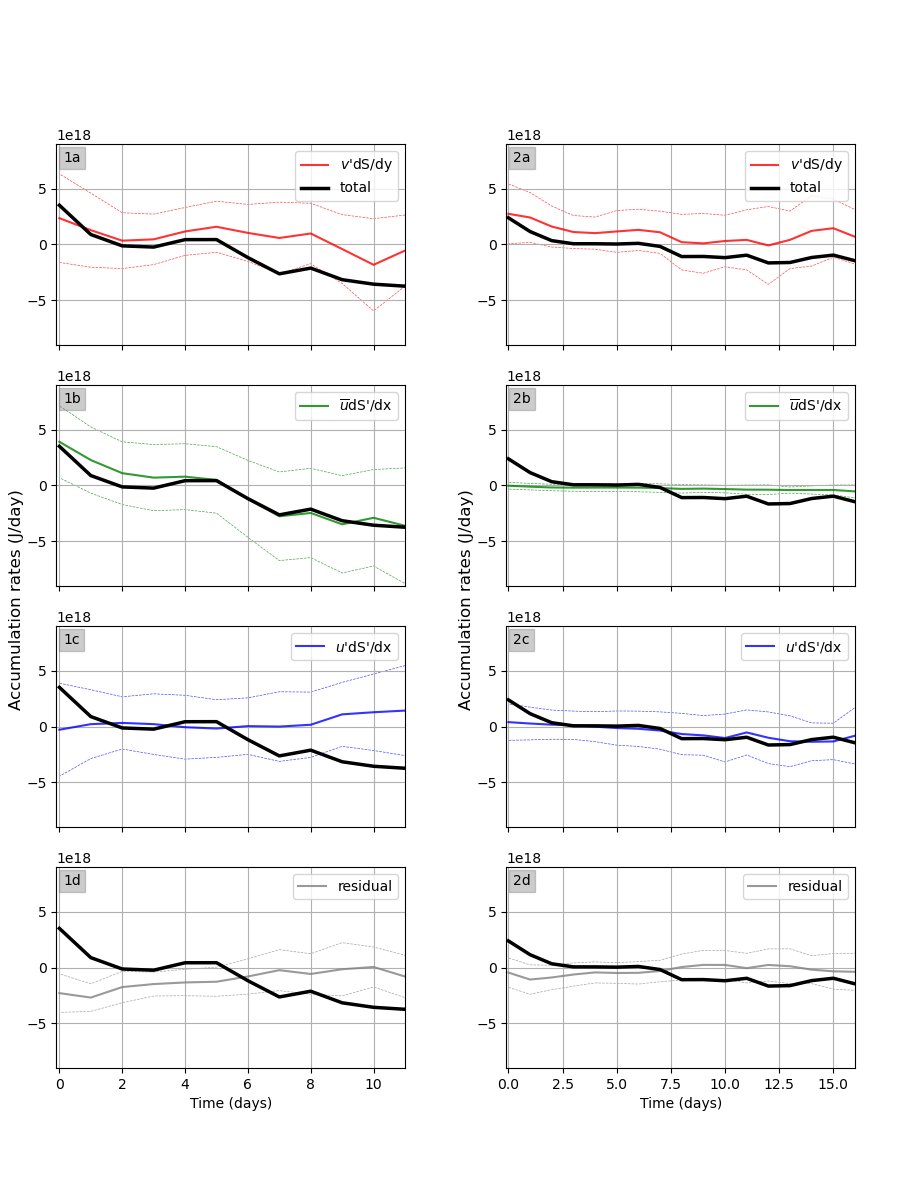

1.4328011202913962 4.4057560048439885
[ 3.00058858  3.16915082  3.84067066  4.10967979  6.15602779 13.47954251]
7.834274323196287


/tmp/ipykernel_942205/2500647820.py:123: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
/tmp/ipykernel_942205/2500647820.py:124: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_942205/2500647820.py:125: RuntimeWarning: invalid value encountered in true_divide
  ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_942205/2500647820.py:127: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_942205/2500647820.py:128: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_942205/2500647820.py:129: RuntimeWarning: invalid value encountered in true_divide
  ax[1].f

0.8260446335464808 5.067547951338152
[ 3.00055761  3.2139928   4.2378211   4.65521019  7.63112257 19.55768076]


/tmp/ipykernel_942205/2500647820.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,


In [9]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(9, 12))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(4, 1, sharex=True, sharey=True)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
vert_arr=np.zeros(15)
vert_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)
# cv=np.zeros(15)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

print(np.mean(dur_sel))
# print(c)

ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
ax[1].fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

ax[2].plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
ax[2].fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')

ax[0].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
ax[1].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[2].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')


ax[3].plot(res_arr/c3, label='residual', color='grey', alpha=0.8)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
ax[3].fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.7,edgecolor='grey', facecolor='none', linewidth=0.5, linestyle='--')
ax[3].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[3].legend()
ax[3].grid()
set_label(subfigs[0], ax[3],'1d')

plt.xlim([-0.1,11])

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.ylim(-9e18, 9e18)
subfigs[0].supylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
ax[0].grid()
ax[1].grid()
ax[2].grid()
set_label(subfigs[0], ax[0],'1a')
set_label(subfigs[0], ax[1],'1b')
set_label(subfigs[0], ax[2],'1c')

###############################################################################
###############################################################################

ax = subfigs[1].subplots(4, 1, sharex=True, sharey=True)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)
res_arr=np.zeros(20)
res_arr2=np.zeros(20)
vert_arr=np.zeros(20)
vert_arr2=np.zeros(20)
act=np.zeros(20)
act2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

c0=np.zeros(20)
c1=np.zeros(20)
c2=np.zeros(20)
c3=np.zeros(20)
c4=np.zeros(20)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
ax[1].fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

ax[2].plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
ax[2].fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')


ax[0].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
ax[1].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[2].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')


ax[3].plot(res_arr/c3, label='residual', color='grey', alpha=0.8)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
ax[3].fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.7,edgecolor='grey', facecolor='none', linewidth=0.5, linestyle='--')
ax[3].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[3].legend()
ax[3].grid()
set_label(subfigs[1], ax[3],'2d')

plt.xlim([-0.1,16])
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.ylim(-9e18, 9e18)
# ax[0].set_xlim([-0.1,16])
subfigs[1].supylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
ax[0].grid()
ax[1].grid()
ax[2].grid()
set_label(subfigs[1], ax[0],'2a')
set_label(subfigs[1], ax[1],'2b')
set_label(subfigs[1], ax[2],'2c')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur90.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


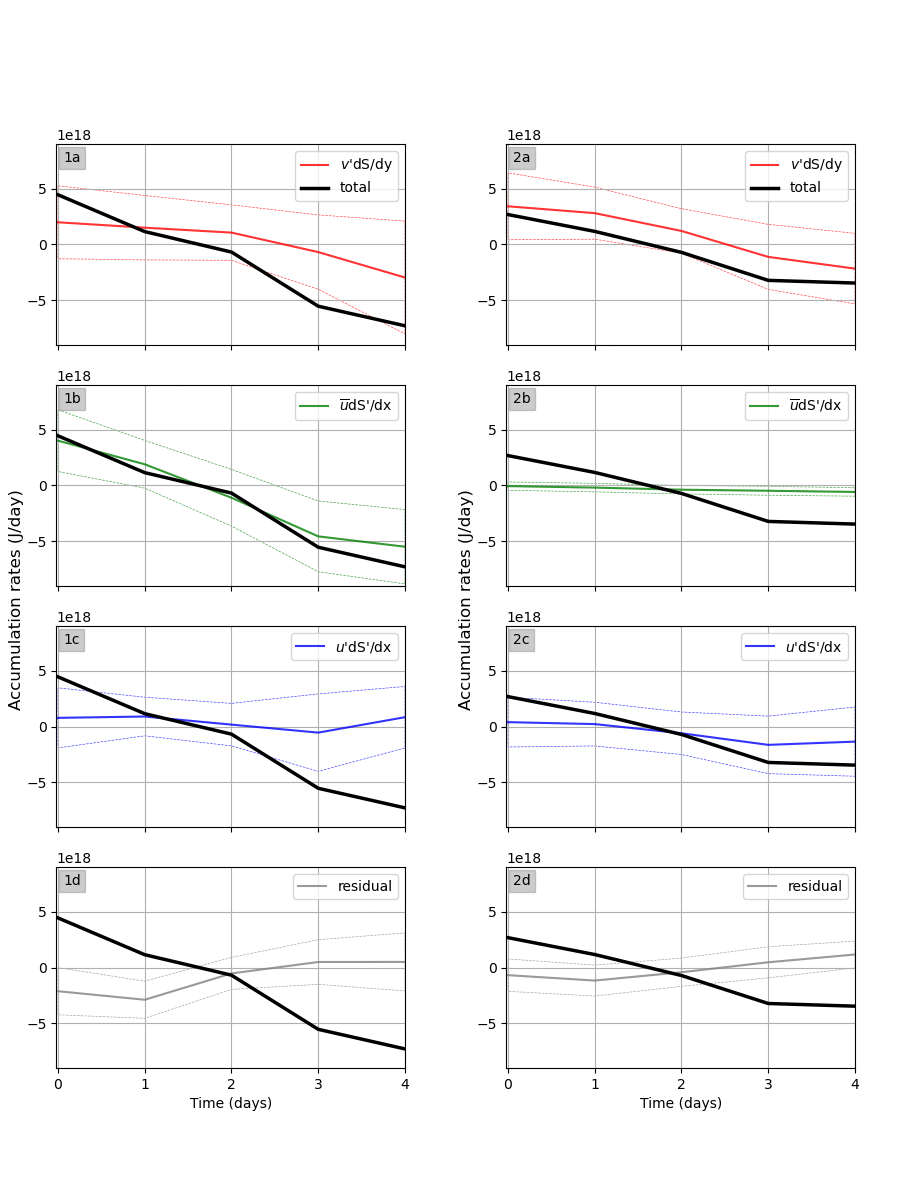

1.4328011202913962 4.4057560048439885
[ 3.00058858  3.16915082  3.84067066  4.10967979  6.15602779 13.47954251]
3.0781605191731916


/tmp/ipykernel_942205/3283719645.py:123: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
/tmp/ipykernel_942205/3283719645.py:124: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_942205/3283719645.py:125: RuntimeWarning: invalid value encountered in true_divide
  ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_942205/3283719645.py:127: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_942205/3283719645.py:128: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_942205/3283719645.py:129: RuntimeWarning: invalid value encountered in true_divide
  ax[1].f

0.8260446335464808 5.067547951338152
[ 3.00055761  3.2139928   4.2378211   4.65521019  7.63112257 19.55768076]


/tmp/ipykernel_942205/3283719645.py:267: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
/tmp/ipykernel_942205/3283719645.py:268: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_942205/3283719645.py:269: RuntimeWarning: invalid value encountered in true_divide
  ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_942205/3283719645.py:271: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_942205/3283719645.py:272: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_942205/3283719645.py:273: RuntimeWarning: invalid value encountered in true_divide
  ax[1].f

In [10]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

def set_label(fig, ax, label):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily=None,
            bbox=dict(color='grey', facecolor='1', edgecolor='none', pad=3.0, alpha=0.4))

fig = plt.figure(figsize=(9, 12))
subfigs = fig.subfigures(1, 2, wspace=0)

ax = subfigs[0].subplots(4, 1, sharex=True, sharey=True)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
vert_arr=np.zeros(15)
vert_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)
# cv=np.zeros(15)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

print(np.mean(dur_sel))
# print(c)

ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
ax[1].fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

ax[2].plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
ax[2].fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')


ax[0].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
ax[1].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[2].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')

ax[3].plot(res_arr/c3, label='residual', color='grey', alpha=0.8)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
ax[3].fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.7,edgecolor='grey', facecolor='none', linewidth=0.5, linestyle='--')
ax[3].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[3].legend()
ax[3].grid()
set_label(subfigs[0], ax[3],'1d')


plt.xlim([-0.02,4])

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.ylim(-9e18, 9e18)
subfigs[0].supylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
ax[0].grid()
ax[1].grid()
ax[2].grid()
set_label(subfigs[0], ax[0],'1a')
set_label(subfigs[0], ax[1],'1b')
set_label(subfigs[0], ax[2],'1c')

###############################################################################
###############################################################################

ax = subfigs[1].subplots(4, 1, sharex=True, sharey=True)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)
res_arr=np.zeros(20)
res_arr2=np.zeros(20)
vert_arr=np.zeros(20)
vert_arr2=np.zeros(20)
act=np.zeros(20)
act2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

c0=np.zeros(20)
c1=np.zeros(20)
c2=np.zeros(20)
c3=np.zeros(20)
c4=np.zeros(20)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

ax[0].plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
ax[0].fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

ax[1].plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
ax[1].fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

ax[2].plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
ax[2].fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')


ax[0].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
ax[1].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[2].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')

ax[3].plot(res_arr/c3, label='residual', color='grey', alpha=0.8)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
ax[3].fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.7,edgecolor='grey', facecolor='none', linewidth=0.5, linestyle='--')
ax[3].plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black')
ax[3].legend()
ax[3].grid()
set_label(subfigs[1], ax[3],'2d')

plt.xlim([-0.02,4])
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.ylim(-9e18, 9e18)
# ax[0].set_xlim([-0.1,16])
subfigs[1].supylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
ax[0].grid()
ax[1].grid()
ax[2].grid()
set_label(subfigs[1], ax[0],'2a')
set_label(subfigs[1], ax[1],'2b')
set_label(subfigs[1], ax[2],'2c')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur10.pdf', bbox_inches='tight')